Augment the literature data

In [28]:
# Load libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from modelval import pairptl, network, trainer, dataset, dw_gen, perform_eval
from modelval.ArbDataGen import arb_w_gen
from modelval.spk_visu import spk_see, raster

import warnings
warnings.filterwarnings('ignore')

% matplotlib inline
% load_ext autoreload
% autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Load data frame
data = pd.read_csv('/src/Plasticity_Ker/data/kernel_training_data_auto.csv')
data.head()

,ptl_idx,pre_spk_num,pre_spk_freq,post_spk_num,post_spk_freq,ptl_occ,ptl_freq,dt1,dt2,dt3,dw_mean,dw_ste,train_len
0,1,1,0,1,0,60,1.0,-102.898046,0.0,0,-1.322590,0.0,60
1,1,1,0,1,0,60,1.0,-75.579896,0.0,0,2.674768,0.0,60
2,1,1,0,1,0,60,1.0,-80.871473,0.0,0,-12.696449,0.0,60
3,1,1,0,1,0,60,1.0,-67.562239,0.0,0,0.231446,0.0,60
4,1,1,0,1,0,60,1.0,-63.553410,0.0,0,-0.990216,0.0,60


In [3]:
# Generate data for STDP
data1 = data[data['ptl_idx']==1]
data1_gen, targets1 = dw_gen.STDP_dw_gen(n_neighbors=3)

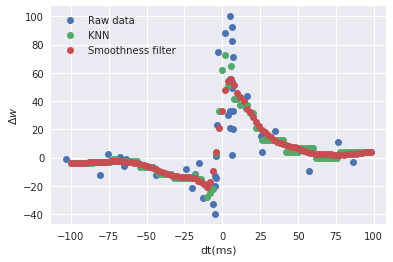

In [4]:
plt.plot(data1['dt1'], data1['dw_mean'],'o', label='Raw data')
width_list = np.concatenate([np.linspace(10,3,50), np.linspace(3,10,50)])
plt.plot(data1_gen['dt1'], targets1,'o', label='KNN')
targets1_sm = dw_gen.smooth(targets1,width_list = width_list)
plt.plot(data1_gen['dt1'],targets1_sm,'o', label='Smoothness filter')
plt.xlabel('dt(ms)')
plt.ylabel('$\Delta w$')
plt.legend(loc='upper left')

In [5]:
# Generate data for Triplet
dt = np.array([-10, -5, 0, 5, 10]).reshape(-1,1)
data2_gen, targets2 = dw_gen.triplet_dw_gen(dt)

In [6]:
# Visualize the triplet data
data2_gen

,ptl_idx,pre_spk_num,pre_spk_freq,post_spk_num,post_spk_freq,ptl_occ,ptl_freq,dt1,dt2,dt3,dw_mean,dw_ste,train_len
0,2.0,2.0,0.0,1.0,0.0,60.0,1.0,-10.0,10.0,0.0,2.634968,0.000000,60.0
1,2.0,2.0,0.0,1.0,0.0,60.0,1.0,-5.0,5.0,0.0,-0.162906,0.000000,60.0
2,2.0,2.0,0.0,1.0,0.0,60.0,1.0,0.0,0.0,0.0,50.000000,0.000000,60.0
3,2.0,1.0,0.0,2.0,0.0,60.0,1.0,5.0,-5.0,0.0,27.321098,0.000000,60.0
4,2.0,1.0,0.0,2.0,0.0,60.0,1.0,10.0,-10.0,0.0,25.392321,0.000000,60.0
139,4.0,2.0,0.0,1.0,0.0,60.0,1.0,-15.0,5.0,0.0,0.246154,3.354050,60.0
140,4.0,2.0,0.0,1.0,0.0,60.0,1.0,-5.0,15.0,0.0,23.154206,4.891500,60.0
141,4.0,1.0,0.0,2.0,0.0,60.0,1.0,5.0,-15.0,0.0,20.722837,7.546790,60.0
142,4.0,1.0,0.0,2.0,0.0,60.0,1.0,15.0,-5.0,0.0,28.118581,4.751571,60.0


In [7]:
# Generate data for Quadruplet
data3 = data[data['ptl_idx']==3]
data3_gen, targets3 = dw_gen.quad_dw_gen(n_neighbors=7)

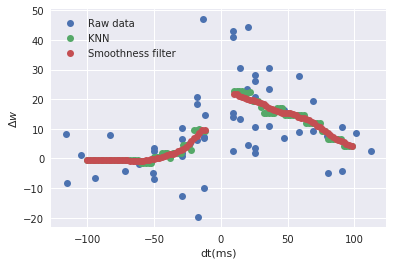

In [8]:
width_list = np.concatenate([np.linspace(10,3,45), np.linspace(3,10,45)])
plt.plot(data3['dt2'], data3['dw_mean'],'o', label='Raw data')
plt.plot(data3_gen['dt2'], targets3,'o', label='KNN')
targets3_sm = np.concatenate([dw_gen.smooth(targets3[:45],width_list = width_list), dw_gen.smooth(targets3[45:],width_list = width_list)])
plt.plot(data3_gen['dt2'],targets3_sm,'o', label='Smoothness filter')
plt.xlabel('dt(ms)')
plt.ylabel('$\Delta w$')
plt.legend(loc='upper left')

In [9]:
trip_para = pd.read_pickle('/src/Plasticity_Ker/data/Gerstner_trip_para_df')
trip_para
# Reorder columns to match parameter of the model
trip_para = trip_para[['A2_+', 'A3_-', 'A2_-', 'A3_+', 'Tau_+', 'Tau_x', 'Tau_-', 'Tau_y']]
trip_para

A2_+     A3_-    A2_-    A3_+ Tau_+ Tau_x Tau_-  \
Visu_AlltoAll    Full    5e-10  0.00023   0.007  0.0062  16.8   101  33.7   
                 Min         0        0  0.0071  0.0065  16.8     1  33.7   
Visu_NearestSpk  Full  8.8e-11   0.0031  0.0066   0.053  16.8   714  33.7   
                 Min         0        0   0.008    0.05  16.8     1  33.7   
Hippo_AlltoAll   Full   0.0061   0.0014  0.0016  0.0067  16.8   946  33.7   
                 Min    0.0053        0  0.0035   0.008  16.8     1  33.7   
Hippo_NearestSpk Full   0.0046  7.5e-09   0.003  0.0091  16.8   575  33.7   
                 Min    0.0046        0   0.003  0.0091  16.8     1  33.7   

                      Tau_y  
Visu_AlltoAll    Full   125  
                 Min    114  
Visu_NearestSpk  Full    40  
                 Min     40  
Hippo_AlltoAll   Full    27  
                 Min     40  
Hippo_NearestSpk Full    47  
                 Min     48

In [10]:
# Visualize kernel
from modelval.kernel import KernelGen
ker_test = KernelGen()

para = trip_para.loc[('Hippo_AlltoAll', 'Full'), :]
a = para[:4].values
tau = para[4:].values
reso_set = 2
tau_pre_post = tau[0]/reso_set  # ms
tau_post_pre = tau[2]/reso_set # ms

ker_test = KernelGen(len_kernel=101)
ker_test.trip_model_ker(para, data_name='Hippocampus')

In [11]:
data_gen = pd.concat([data1_gen, data2_gen, data3_gen])
targets = np.concatenate([targets1_sm, targets2, targets3_sm])

([<matplotlib.lines.Line2D at 0x7f280cd10ac8>],)

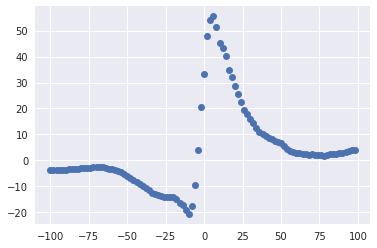

In [16]:
plt.plot(data_gen.iloc[:len(data1_gen)]['dt1'],targets[:targets1.shape[0]],'o'), 

([<matplotlib.lines.Line2D at 0x7f280cc8d358>],)

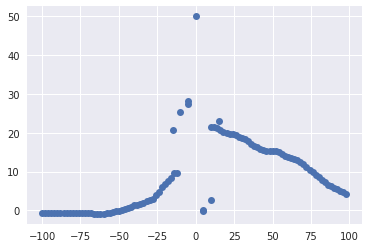

In [17]:
plt.plot(data_gen.iloc[len(data1_gen):]['dt2'],targets[targets1.shape[0]:],'o'), 

In [18]:
data_gen['ptl_idx'].value_counts()

1.0    100
3.0     90
2.0      5
4.0      4
Name: ptl_idx, dtype: int64

In [20]:
ptl_list = [1,2,4,3]
spk_len = int(data3_gen['train_len'].max() * 1000 / ker_test.reso_kernel)
if_noise = 0
aug_times = [20,40,40,20]
spk_pairs, targets = arb_w_gen(df=data_gen, ptl_list=ptl_list, targets=targets, if_noise=if_noise, spk_len=spk_len, kernel=ker_test, net_type='triplet', aug_times=aug_times)

In [22]:
spk_pairs.shape

(4160, 30000, 2)

In [25]:
len_stdp = len(data1_gen)*20
len_triplet = len(data1_gen)*20+len(data2_gen[data2_gen['ptl_idx']==2])*40
len_trip2 = len(data1_gen)*20+len(data2_gen[data2_gen['ptl_idx']==2])*40+len(data2_gen[data2_gen['ptl_idx']==4])*40
len_quad = len(targets) - len_trip2

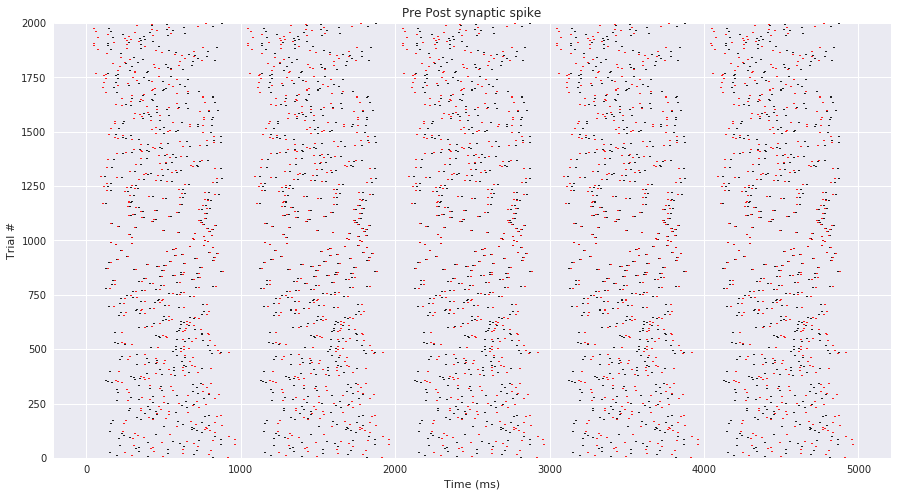

In [34]:
# Visualize spike trains to check accuracy
# STDP:
spk_stdp = spk_pairs[:len_stdp,:,:]
loci_pre, loci_post = spk_see(ptl_type=1, spk_pairs=spk_stdp)
fig = plt.figure(figsize=(15, 8))
trial_length = np.arange(0,5)
ax = raster(loci_pre, trial_length)
ax = raster(loci_post,trial_length, color='r')
plt.title('Pre Post synaptic spike')
plt.xlabel('Time (ms)')
plt.ylabel('Trial #')
plt.legend()
fig.show()

In [ ]:
# triplet:
spk_trip1 = spk_pairs[len_stdp:len_triplet,:,:]
loci_pre, loci_post = spk_see(ptl_type=1, spk_pairs=spk_stdp)
fig = plt.figure(figsize=(15, 8))
trial_length = np.arange(0,5)
ax = raster(loci_pre, trial_length)
ax = raster(loci_post,trial_length, color='r')
plt.title('Pre Post synaptic spike')
plt.xlabel('Time (ms)')
plt.ylabel('Trial #')
plt.legend()
fig.show()

In [ ]:
targets.shape

In [ ]:
# Create the network
ground_truth_init = 0
reg_scale=(1, 1)
init_seed=(4,5,6,7)
toy_data_net = network.TripNet(kernel=ker_test, ground_truth_init=ground_truth_init, init_seed=init_seed, reg_scale=reg_scale, n_input=spk_pairs.shape[1])

In [ ]:
# Create the trainer
save_dir= '/src/Plasticity_Ker/model/Trip_ptl1_4_real_aug_no_noise'
toy_net_trainer = trainer.Trainer(toy_data_net.loss, toy_data_net.loss, input_name=toy_data_net.inputs, target_name=toy_data_net.target, save_dir=save_dir, optimizer_config={'learning_rate': toy_data_net.lr})

In [ ]:
# Obtain the training and validation data
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(spk_pairs, targets, test_size=0.1)
X_train, X_vali, y_train, y_vali = train_test_split(X_train_val,  y_train_val, test_size=0.1)
train_data = dataset.Dataset(X_train, y_train)
vali_data = dataset.Dataset(X_vali, y_vali)

In [ ]:
w_pre = toy_net_trainer.evaluate(ops=toy_data_net.kernel_pre)
w_post = toy_net_trainer.evaluate(ops=toy_data_net.kernel_post)
w_post_post = toy_net_trainer.evaluate(ops=toy_data_net.kernel_post_post)
fc_w = toy_net_trainer.evaluate(ops=toy_data_net.fc_w)
bias = toy_net_trainer.evaluate(ops=toy_data_net.bias)
plt.plot(w_pre,  label='ker_pre_trained')
plt.plot(w_post,  label='ker_post_trained')
plt.plot(w_post_post,  label='ker_post_trained')
plt.legend()
print(fc_w, bias)

In [ ]:
# # Learn the kernel from random initialization
# learning_rate = 0.001
# iterations = 5
# min_error = -1
# for i in range(iterations):
#     toy_net_trainer.train(train_data, vali_data, batch_size=128, min_error=min_error, feed_dict={toy_data_net.lr: learning_rate})
#     learning_rate = learning_rate/3

In [ ]:
toy_net_trainer.restore_best()
w_pre = toy_net_trainer.evaluate(ops=toy_data_net.kernel_pre)
w_post = toy_net_trainer.evaluate(ops=toy_data_net.kernel_post)
w_post_post = toy_net_trainer.evaluate(ops=toy_data_net.kernel_post_post)
fc_w = toy_net_trainer.evaluate(ops=toy_data_net.fc_w)
bias = toy_net_trainer.evaluate(ops=toy_data_net.bias)
plt.plot(-1*w_pre, label='ker_pre_trained')
plt.plot(-1*w_post, label='ker_post_trained')
plt.plot(-1 * w_post_post, label='ker_post_post_trained')
plt.legend()
print([fc_w, bias])

In [ ]:
# # Test effect of smoothed kernel
# w_pre_sm = w_pre
# w_post_sm = w_post 
# w_post_post_sm = w_post_post
# w_pre_sm[:50] = dw_gen.smooth(w_pre[:50], width=2)
# w_post_sm[:48] = dw_gen.smooth(w_post[:48], width=2)
# w_post_post_sm[:49] = dw_gen.smooth(w_post_post[:49], width=3)

# plt.plot(-1 * w_pre_sm)
# plt.plot(-1 * w_post_sm)
# plt.plot(-1*w_post_post_sm)

# ker_test.kernel_pre = w_pre_sm
# ker_test.kernel_post = w_post_sm
# ker_test.kernel_post_post= w_post_post_sm
# ker_test.kernel_scale = fc_w
# ker_test.bias = bias

Compare the target and prediction

In [ ]:
ker_test.kernel_pre = w_pre
ker_test.kernel_post = w_post
ker_test.kernel_post_post= w_post_post
ker_test.kernel_scale = fc_w
ker_test.bias = bias

In [ ]:
spk_len = int(data1_gen['train_len'].max() * 1000 / ker_test.reso_kernel)
spk_pairs, predictions = arb_w_gen(spk_pairs=spk_pairs, spk_len=spk_len, kernel=ker_test, net_type='triplet')

In [ ]:
# np.save('/src/Plasticity_Ker/data/predictions.npy', predictions)
# predictions = np.load('/src/Plasticity_Ker/data/predictions.npy')

In [ ]:
x_fit = np.linspace(np.min(targets)-1, np.max(targets)+1, 100)
targets_stdp = targets[:len_stdp]
predictions_stdp = predictions[:len_stdp]
targets_triplet = targets[len_stdp:len_triplet]
predictions_triplet = predictions[len_stdp:len_triplet]
targets_trip2 = targets[len_triplet:len_trip2]
predictions_trip2 = predictions[len_triplet:len_trip2]
targets_quad = targets[len_trip2:]
predictions_quad = predictions[len_trip2:]
R2, corr, y_fit = perform_eval.R2_corr(predictions,targets, x_fit)
R2_stdp, corr_stdp, y_fit_stdp = perform_eval.R2_corr(predictions_stdp,targets_stdp, x_fit)
R2_triplet, corr_triplet, y_fit_triplet = perform_eval.R2_corr(predictions_triplet,targets_triplet, x_fit)
R2_quad, corr_quad, y_fit_quad = perform_eval.R2_corr(predictions_quad ,targets_quad, x_fit)
R2_quad, corr_trip2, y_fit_trip2 = perform_eval.R2_corr(predictions_trip2 ,targets_trip2, x_fit)

In [ ]:
predictions.shape

In [ ]:
plt.plot(x_fit, y_fit_stdp, 'k--')
#plt.plot(x_fit, y_fit_triplet, 'r--')
plt.plot(x_fit, y_fit_quad, 'b--')

plt.plot(targets_stdp, predictions_stdp, 'o', label='stdp(n={a})'.format(a=len_stdp))
plt.plot(targets_quad, predictions_quad, 'o', label='quadruplet(n={a})'.format(a=len(targets)-len_trip2))
plt.plot(targets_triplet, predictions_triplet, 'o', label='triplet(n={a})'.format(a=(len_triplet-len_stdp)))
plt.plot(targets_trip2, predictions_trip2, 'o', label='triplet2(n={a})'.format(a=(len_trip2-len_triplet)))


plt.xlabel('targets')
plt.ylabel('predictions')
plt.title(''.join(('R2=%.4f'%(R2), ', Corr=%.4f'%(corr))))
plt.legend()

In [ ]:
test= spk_pairs[len(data1_gen)*20:, :,:]

Generate test restuls

In [ ]:
ptl_list = [1,2,4,3]
spk_len = int(data1_gen['train_len'].max() * 1000 / ker_test.reso_kernel)
spk_pairs, predictions = arb_w_gen(spk_pairs=X_test, df=data1_gen, ptl_list=ptl_list, spk_len=spk_len, kernel=ker_test, aug_times=[20])

In [ ]:
targets_test = y_test

In [ ]:
# Calculate R square
R2 = 1 - np.sum(np.square(predictions - targets_test))/np.sum(np.square(targets_test - np.mean(targets_test)))
# Calculate correlation coefficient
corr = np.sum(np.dot((predictions - np.mean(predictions)).T, targets_test- np.mean(targets_test)))/np.std(predictions)/np.std(targets_test)/len(targets_test)
b1 = np.sum(np.dot((predictions - np.mean(predictions)).T, targets_test - np.mean(targets_test)))/np.sum(np.square(targets_test - np.mean(targets_test)))
b2 = np.mean(predictions) - np.mean(targets_test)*b1
x_fit = np.linspace(np.min(targets_test)-1, np.max(targets_test)+1, 100)
y_fit = x_fit * b1 + b2
plt.plot(x_fit, y_fit, 'k--')
plt.plot(targets_test, predictions, 'ro')
plt.xlabel('targets')
plt.ylabel('predictions')
plt.title(''.join(('R2=%.4f'%(R2), ', Corr=%.4f'%(corr))))